<a href="https://colab.research.google.com/github/HuanAII/Excercise/blob/main/ExerciseLogisticRegression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [74]:
df=pd.read_csv('/content/titanic_modified_dataset.csv',index_col='PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [73]:
data_set_arr=df.to_numpy().astype(np.float64)
print(data_set_arr)
X=data_set_arr[:,:-1]
y=data_set_arr[:,-1]
print(y)

(891, 9)
[[ 3.  0. 22. ...  0.  0.  0.]
 [ 1.  1. 38. ...  1.  1.  1.]
 [ 3.  1. 26. ...  0.  2.  1.]
 ...
 [ 3.  1. 28. ...  0.  2.  0.]
 [ 1.  0. 26. ...  1.  0.  1.]
 [ 3.  0. 32. ...  2.  0.  0.]]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.

In [56]:
intercept=np.ones((X.shape[0],1))
X_b=np.concatenate((intercept,X),axis=1)
print(X_b)

[[ 1.      3.      0.     ...  7.25    0.      0.    ]
 [ 1.      1.      1.     ... 71.2833  1.      1.    ]
 [ 1.      3.      1.     ...  7.925   0.      2.    ]
 ...
 [ 1.      3.      1.     ... 23.45    0.      2.    ]
 [ 1.      1.      0.     ... 30.      1.      0.    ]
 [ 1.      3.      0.     ...  7.75    2.      0.    ]]


In [67]:
val_size = 0.2
test_size = 0.125
random_state = 1
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [68]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])


In [69]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat


def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()



def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size


def update_theta(theta, gradient, lr):
    return theta - lr * gradient


def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc



In [70]:
lr=0.01
epochs=100
batch_size=16
np.random.seed(random_state)
theta=np.random.uniform(size=X_train.shape[1])
print(theta)


[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01]


In [71]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.813	Validation loss: 0.830

EPOCH 2:	Training loss: 0.749	Validation loss: 0.771

EPOCH 3:	Training loss: 0.698	Validation loss: 0.724

EPOCH 4:	Training loss: 0.658	Validation loss: 0.686

EPOCH 5:	Training loss: 0.626	Validation loss: 0.656

EPOCH 6:	Training loss: 0.600	Validation loss: 0.632

EPOCH 7:	Training loss: 0.578	Validation loss: 0.611

EPOCH 8:	Training loss: 0.561	Validation loss: 0.595

EPOCH 9:	Training loss: 0.546	Validation loss: 0.581

EPOCH 10:	Training loss: 0.533	Validation loss: 0.570

EPOCH 11:	Training loss: 0.523	Validation loss: 0.560

EPOCH 12:	Training loss: 0.513	Validation loss: 0.552

EPOCH 13:	Training loss: 0.505	Validation loss: 0.545

EPOCH 14:	Training loss: 0.499	Validation loss: 0.539

EPOCH 15:	Training loss: 0.493	Validation loss: 0.533

EPOCH 16:	Training loss: 0.487	Validation loss: 0.529

EPOCH 17:	Training loss: 0.482	Validation loss: 0.525

EPOCH 18:	Training loss: 0.478	Validation loss: 0.521

EPOCH 19:	Training

Text(0.5, 1.0, 'Validation Accuracy')

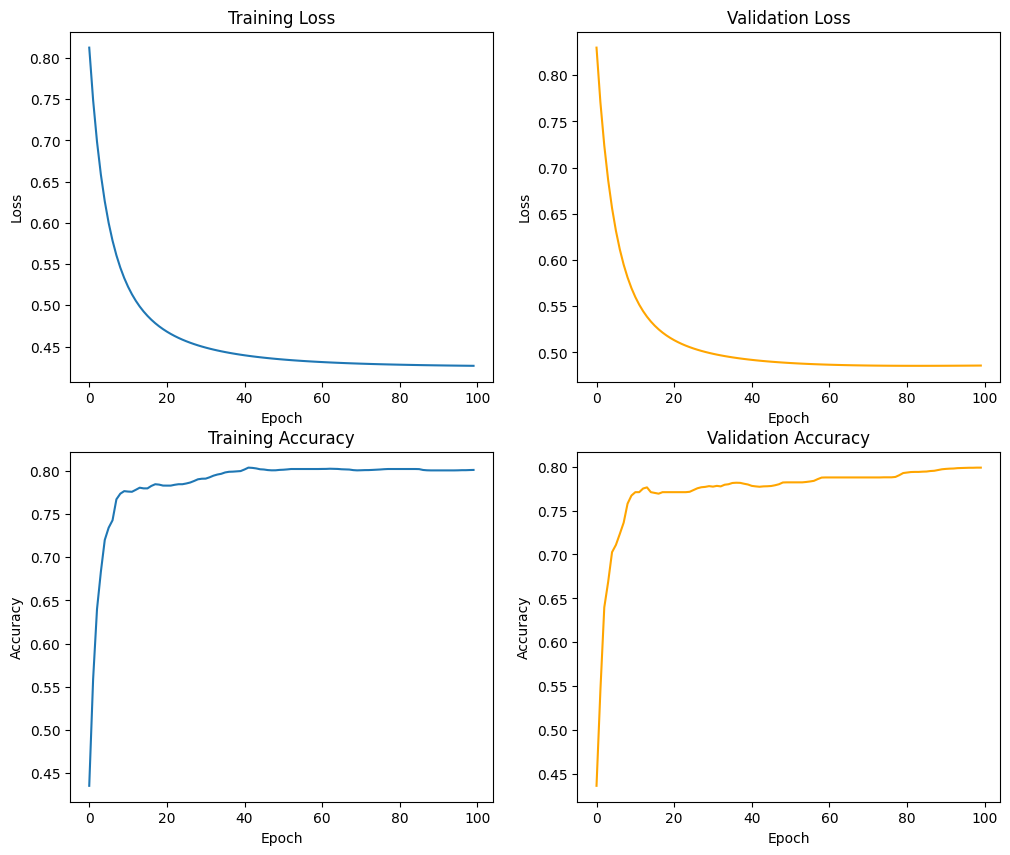

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')
